<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Netflix Titles 2021</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Data</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<a id='import-library'></a>
# <font color='darkred'> <b>Importing Libraries</b><font color='black'> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='darkred'> <b>Loading The Data</b><font color='black'> 

In [6]:
df0 = pd.read_csv("netflix_titles_2021.csv")
df = df0.copy()

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<a id='understanding-dataset'></a>
# <font color='darkred'> <b>Understanding The Dataset</b><font color='black'> 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [12]:
df.describe(include= "object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [14]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6440,s6441,Movie,Chal Mere Bhai,David Dhawan,"Sanjay Dutt, Salman Khan, Karisma Kapoor, Dali...",India,"December 31, 2019",2000,TV-14,132 min,"Comedies, International Movies, Romantic Movies","When a secretary saves her tycoon boss's life,..."
312,s313,TV Show,Cooking With Paris,NaN,Paris Hilton,United States,"August 4, 2021",2021,TV-MA,1 Season,Reality TV,"With an anyone-can-cook attitude, Paris Hilton..."
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7551,s7552,TV Show,Mystery Science Theater 3000,NaN,"Joel Hodgson, Michael J. Nelson, Kevin Murphy,...",United States,"March 15, 2018",1999,TV-14,1 Season,"TV Comedies, TV Sci-Fi & Fantasy",Hosts Joel and Mike and their robot companions...
3377,s3378,TV Show,Nailed It! France,NaN,"Artus, Noémie Honiat",France,"October 25, 2019",2019,TV-14,1 Season,"International TV Shows, Reality TV","On this fun and funny competition show, home b..."


In [15]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

<a id='nan-values'></a>
# <font color='darkred'> <b>NaN Values</b><font color='black'> 

In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

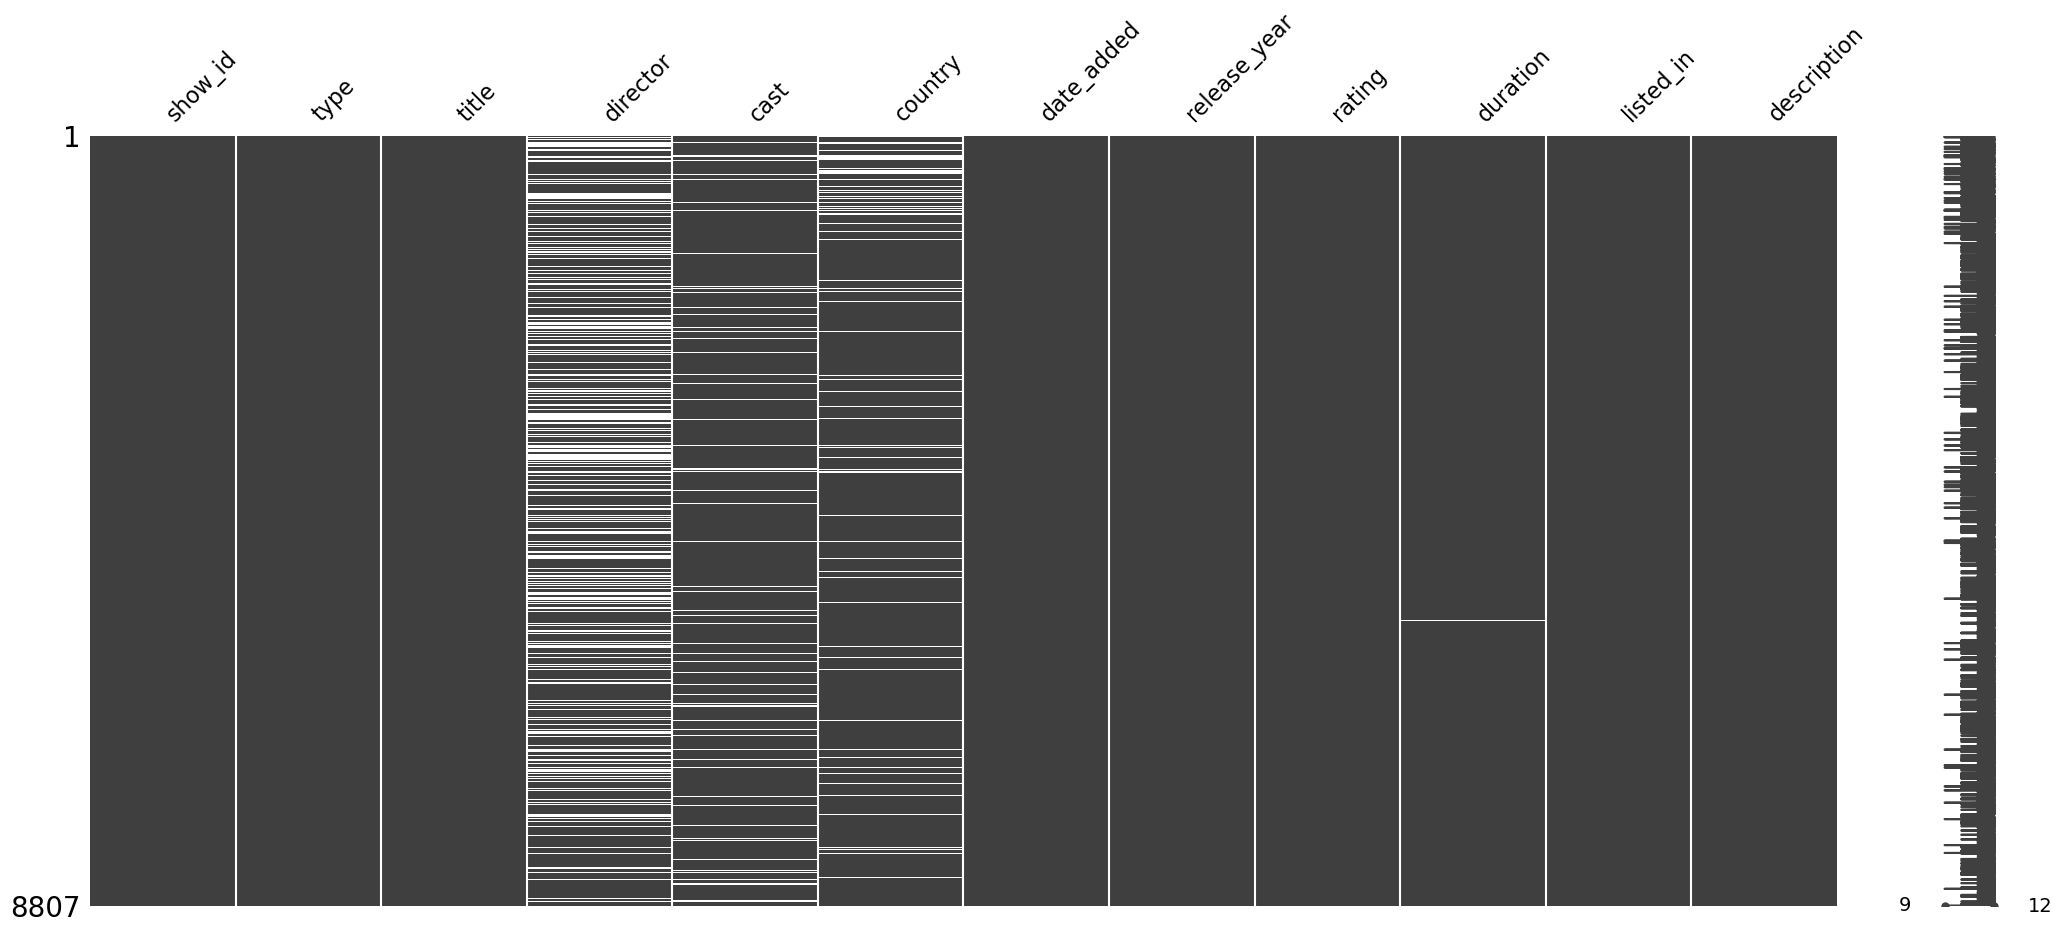

In [18]:
msno.matrix(df);

In [19]:
df["country"].str.split(", ", expand=True).stack().value_counts()

United States           3689
India                   1046
United Kingdom           804
Canada                   445
France                   393
Japan                    318
Spain                    232
South Korea              231
Germany                  226
Mexico                   169
China                    162
Australia                160
Egypt                    117
Turkey                   113
Hong Kong                105
Nigeria                  103
Italy                    100
Brazil                    97
Argentina                 91
Belgium                   90
Indonesia                 90
Taiwan                    89
Philippines               83
Thailand                  70
South Africa              62
Colombia                  52
Netherlands               50
Denmark                   48
Ireland                   46
Sweden                    42
Singapore                 41
Poland                    40
United Arab Emirates      37
New Zealand               33
Lebanon       

In [20]:
df["country"].str.split(", ", expand=True).stack().mode()[0]

'United States'

In [21]:
# Replacements
df["country"] = df["country"].fillna(df["country"].str.split(", ", expand=True).stack().mode()[0])

# Drops
df.dropna(inplace= True)

In [22]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
# save edited data as csv file

# df.to_csv("edited_data.csv", index= False)

<a id='data-visualization'></a>
# <font color='darkred'> <b>Data Visualization</b><font color='black'> 

## <font color='firebrick'> <b>Movie & TV Show Distribution</b><font color='black'> 

In [26]:
type_numbers = df.groupby("type")["type"].count()
data_number = len(df)

type_ratio = round((type_numbers / data_number) * 100, 2)
type_ratio

type
Movie      96.88
TV Show     3.12
Name: type, dtype: float64

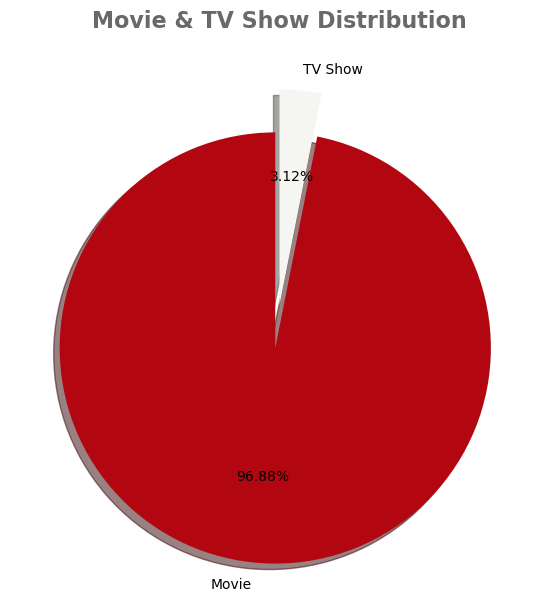

In [27]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(type_ratio.values, labels=type_ratio.index, autopct='%1.2f%%',
       startangle=90,
       shadow= 0.2,
       colors= ['#b20710', '#f5f5f1'],
       explode= (0.2, 0)
      )

ax.set_title('Movie & TV Show Distribution', fontsize=16, fontweight='bold', color= 'dimgrey')

plt.show()

## <font color='firebrick'> <b>Top 10 Genres</b><font color='black'> 

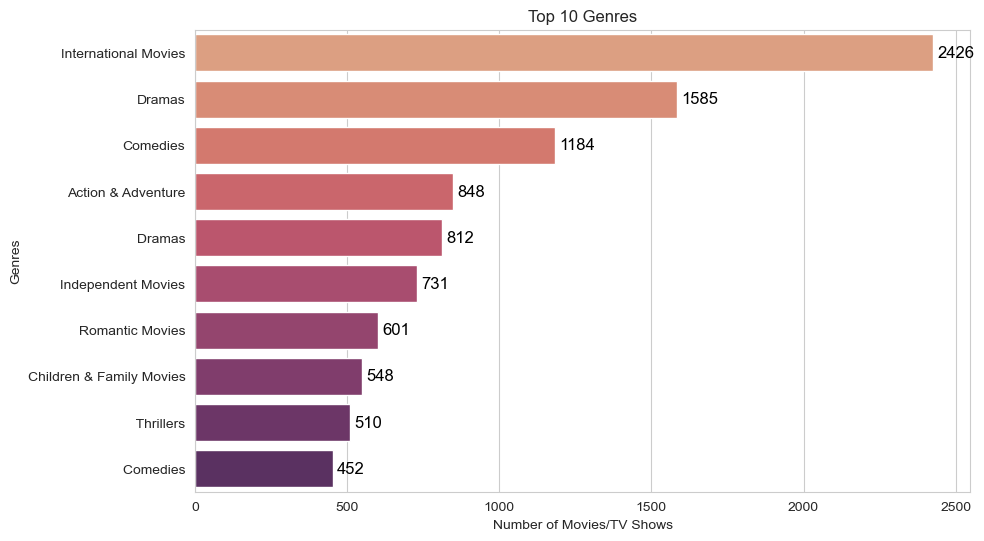

In [29]:
top10_genres = df["listed_in"].str.split(",", expand=True).stack().value_counts()[:10]

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top10_genres.values, y=top10_genres.index, palette="flare")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Number of Movies/TV Shows', ylabel='Genres')
plt.title("Top 10 Genres")
plt.show()

## <font color='firebrick'> <b>Number of Movies/TV Shows Released by Years</b><font color='black'> 

In [31]:
df['date_added'] = pd.to_datetime(df['date_added'], dayfirst= True, format= "mixed")
df['year_added'] = df['date_added'].dt.year

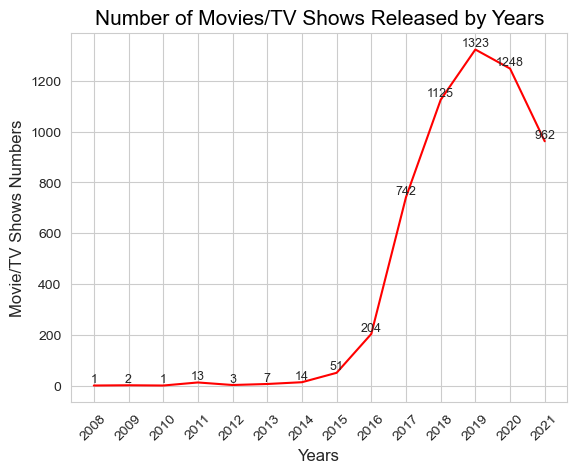

In [32]:
numbers_per_year = df['year_added'].value_counts().sort_index()

plt.figsize = (15,10)
plt.plot(numbers_per_year.index, numbers_per_year.values, color='red')

plt.xlabel('Years', fontsize= 12)
plt.ylabel('Movie/TV Shows Numbers', fontsize= 12)

plt.xticks(np.arange(2008,2022,1), rotation= 45)

plt.title('Number of Movies/TV Shows Released by Years', fontsize= 15, color= 'black')

for x, y in zip(numbers_per_year.index, numbers_per_year.values):
    plt.text(x, y + 0.15, str(y), ha='center', va='bottom', fontsize=9)

plt.show()

## <font color='firebrick'> <b>Distribution of Movie Rating</b><font color='black'> 

In [34]:
movie = df[df['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]

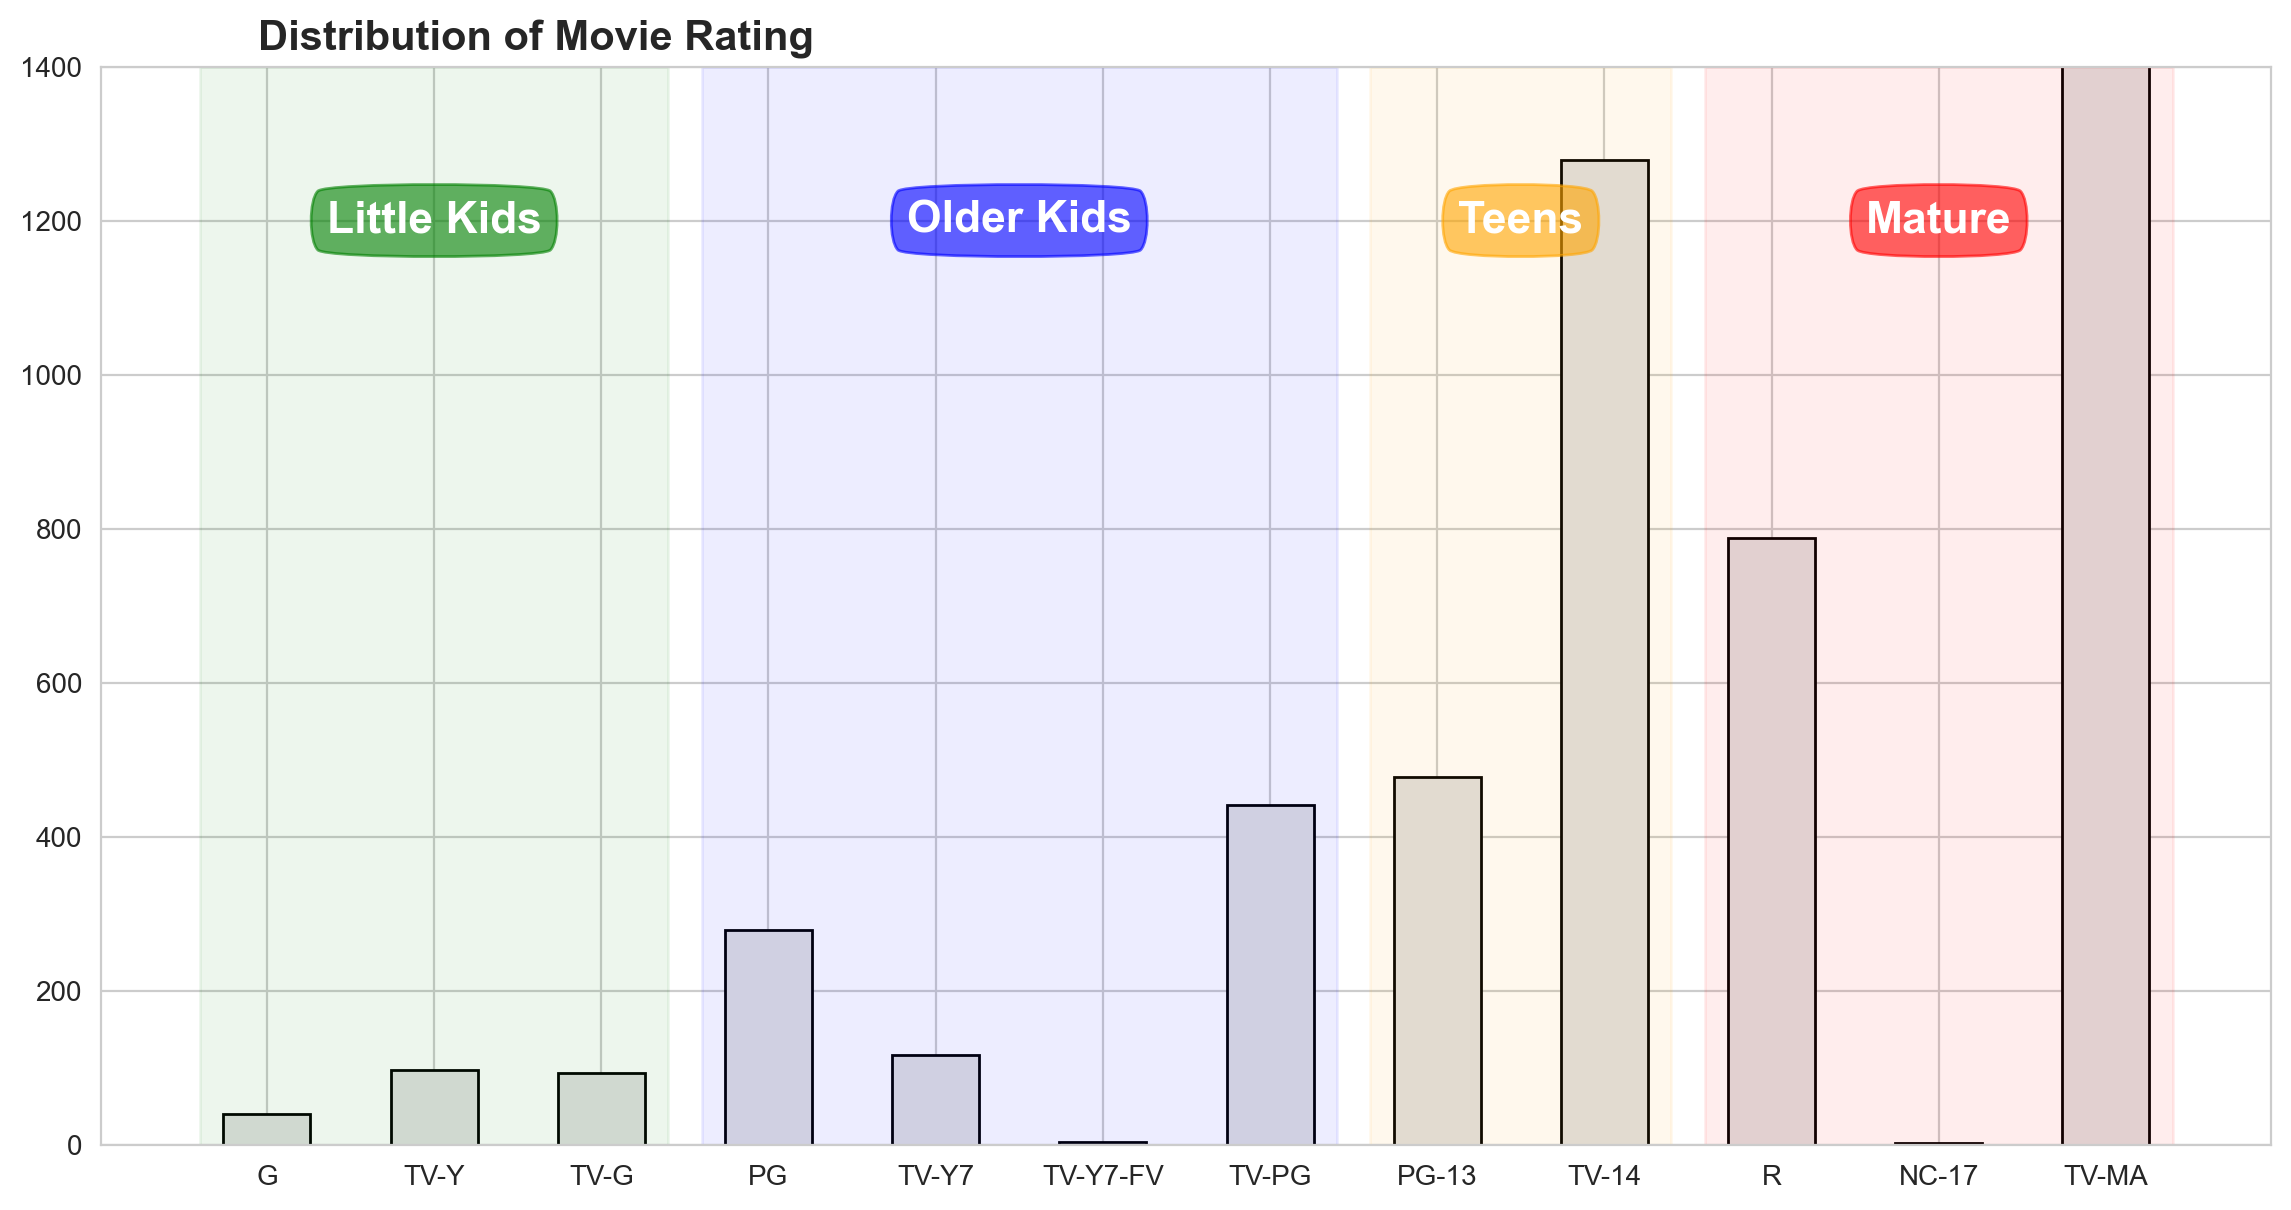

In [35]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    


rating_barplot(movie_rating,'Movie', 1200, 1400)

## <font color='firebrick'> <b>20 Actors/Actress Appeared In The Most Movies/TV Shows</b><font color='black'> 

In [37]:
top20_actors = df["cast"].str.split(", ", expand=True).stack().value_counts()[:20]
top20_actors

Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       32
Akshay Kumar           30
Om Puri                30
Paresh Rawal           28
Amitabh Bachchan       28
Julie Tejwani          28
Rupa Bhimani           27
Boman Irani            27
Kareena Kapoor         25
Samuel L. Jackson      23
Kay Kay Menon          21
Nawazuddin Siddiqui    21
Rajesh Kava            21
Ajay Devgn             21
Adam Sandler           20
Salman Khan            20
Nicolas Cage           20
James Franco           19
Name: count, dtype: int64

In [38]:
top20_actors_df = top20_actors.reset_index()
top20_actors_df.columns = ['Actor/Actress', 'Movie/TV Show Count']
top20_actors_df

,Actor/Actress,Movie/TV Show Count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Akshay Kumar,30
4,Om Puri,30
5,Paresh Rawal,28
6,Amitabh Bachchan,28
7,Julie Tejwani,28
8,Rupa Bhimani,27
9,Boman Irani,27


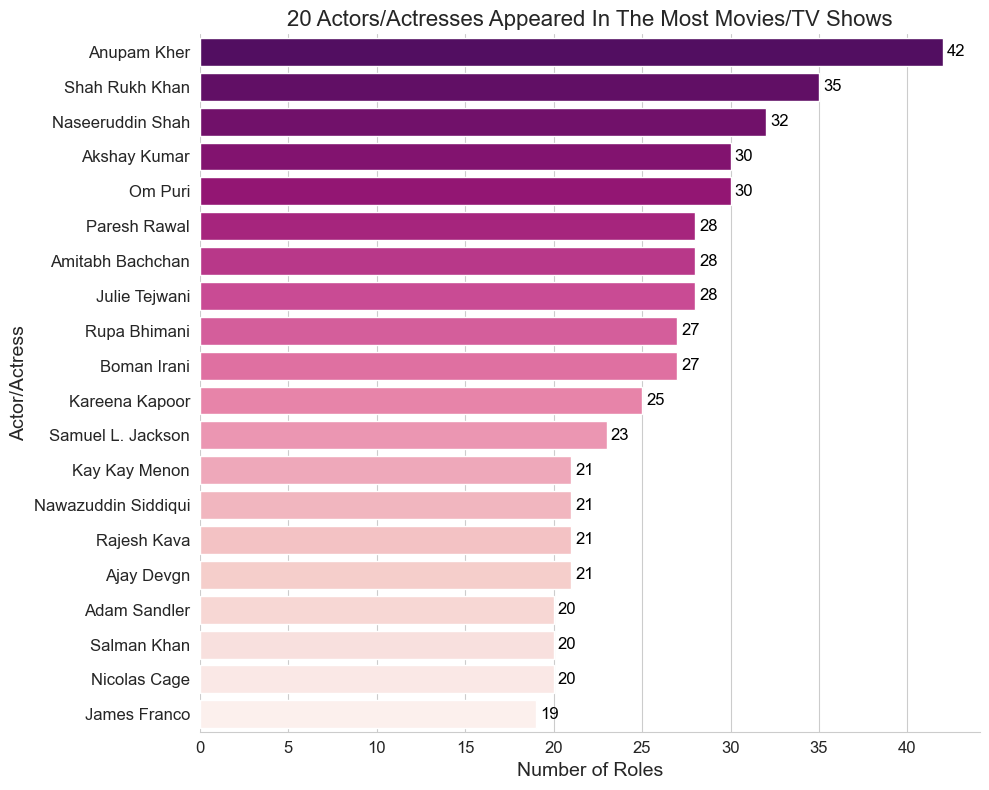

In [39]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,8))

ax = sns.barplot(y='Actor/Actress', x='Movie/TV Show Count', data=top20_actors_df, palette='RdPu_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
sns.despine(left=True)

plt.title('20 Actors/Actresses Appeared In The Most Movies/TV Shows', fontsize=16)
plt.xlabel('Number of Roles', fontsize=14)
plt.ylabel('Actor/Actress', fontsize=14)

plt.xticks(fontsize=12, rotation=0)

plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

## <font color='firebrick'> <b>Distribution of Movies and TV Shows by Country</b><font color='black'> 

In [74]:
country_distribution = df['country'].str.split(', ', expand=True).stack().value_counts()

# Filtering: Only countries with more than a certain number of movies
country_distribution = country_distribution[country_distribution > 10]

country_distribution.reset_index()

,index,count
0,United States,2849
1,India,940
2,United Kingdom,484
3,Canada,295
4,France,293
5,Germany,167
6,Spain,161
7,Japan,124
8,China,109
9,Mexico,101


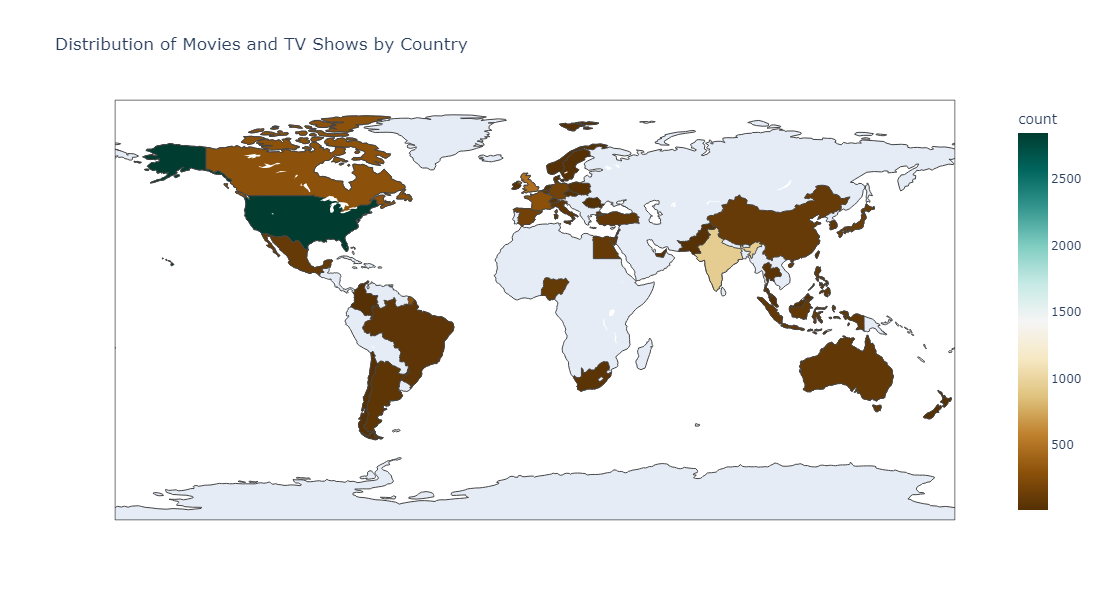

In [90]:
country_data = country_distribution.reset_index()
country_data.columns = ['country', 'count']

fig = px.choropleth(country_data,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    hover_name='country',
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title='Distribution of Movies and TV Shows by Country')

fig.update_layout(
    width=1000,
    height=600)

fig.show()

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>